# Machine Learning

 Question: 2
Train an SVM regressor on : Bengaluru housing dataset

    Must include in details:

  - EDA

  - Feature engineering 



In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV


In [46]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [48]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [49]:
df.shape

(13320, 9)

In [50]:
df.duplicated().sum()

529

In [51]:
df=df.drop_duplicates()

In [52]:
df.shape

(12791, 9)

In [53]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [54]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0


In [55]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [13]:
df['size'] = df['size'].str.replace('Bedroom', 'BHK')

In [14]:
df['size'].value_counts()

2 BHK     5245
3 BHK     4655
4 BHK     1398
1 BHK      625
5 BHK      350
6 BHK      221
7 BHK       99
8 BHK       89
9 BHK       54
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: size, dtype: int64

In [15]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [17]:
df['size'].isna().sum()

16

In [18]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

# EDA and Feature Engineering

<Axes: xlabel='balcony', ylabel='price'>

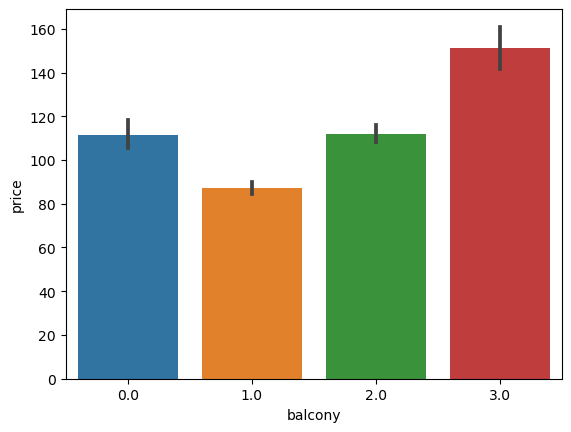

In [57]:
sns.barplot(x=df['balcony'], y=df['price'])

<Axes: xlabel='area_type', ylabel='price'>

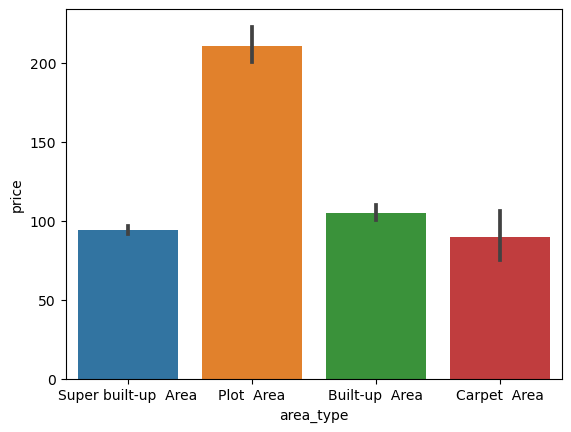

In [58]:
sns.barplot(x=df['area_type'], y=df['price'])

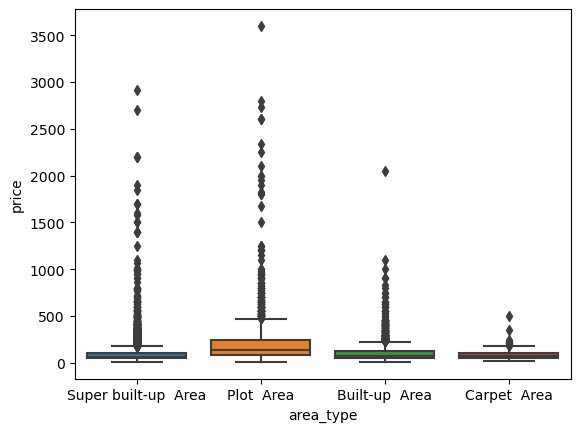

In [19]:
sns.boxplot(df, x='area_type', y='price')
plt.show()

In [60]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [20]:
df['balcony'].value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

In [21]:
df.drop(columns=['balcony', 'society'], axis=1, inplace=True)

In [22]:
df.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [23]:
df.availability.value_counts()

Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [24]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

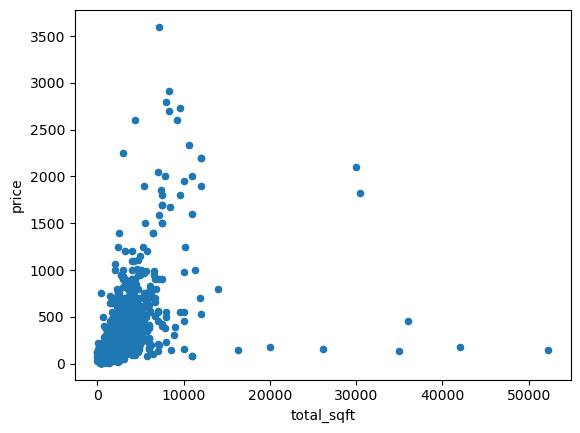

In [25]:
df.plot.scatter(x='total_sqft', y='price')
plt.show()

In [26]:
df['size'] = df['size'].fillna('2 BHK')

In [27]:
df['bath']= df['bath'].fillna(df['bath'].median())

In [28]:
df.isna().sum()

area_type         0
availability      0
location          1
size              0
total_sqft      246
bath              0
price             0
dtype: int64

In [29]:
df=df.dropna()

In [30]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [31]:
df['availability'] = df['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)

C:\Users\02rup\AppData\Local\Temp\ipykernel_16080\4205555394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['availability'] = df['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)


In [32]:
df.availability

0        0
1        1
2        1
3        1
4        1
        ..
13314    1
13315    1
13316    1
13317    1
13318    0
Name: availability, Length: 12544, dtype: int64

In [33]:
X = df.drop(columns = ['price'])
y = df['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [35]:
y_train

2688      58.86
7054      70.00
5434      83.00
3850      62.80
874       50.00
          ...  
5036     275.00
3379     490.00
10375     40.00
11414     73.43
2821      45.00
Name: price, Length: 10035, dtype: float64

In [36]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:
X = preprocessor.fit_transform(X)

In [38]:
X

<12544x1325 sparse matrix of type '<class 'numpy.float64'>'
	with 75264 stored elements in Compressed Sparse Row format>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [40]:
X_train

<10035x1325 sparse matrix of type '<class 'numpy.float64'>'
	with 60210 stored elements in Compressed Sparse Row format>

# Training the model

In [41]:
svr=SVR()

In [42]:
svr.fit(X_train, y_train)

SVR()

In [43]:
y_pred = svr.predict(X_test)

In [44]:
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.3376430591605617
MAE score  39.26111685312265
